# Implementación del perceptrón

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
class Perceptron():
    """
    Perceptron

    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Number of iterations over the training dataset
    random_state: int
        Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_: 1d-array
        Weights after fitting
    errors_: 1d-array
        Number of misclassifications (updates) in each epoch
    """
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Fit training data

        Parameters
        ----------
        X: {np.array}, shape = [n_samples, m_features]
            Training vectors, where n_samples is the number of samples and m_features is the number of features
        y: {np.array}, shape = [n_samples]
            Target values
        """
        rgen = np.random.RandomState(self.random_state)
        if self.random_state is None:
            self.w_ = np.zeros(1 + len(X[0]))
        else:
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print(f'weights: {self.w_}')
            print(f"Epoch {_ + 1}: {errors} errors")
        return self
    
    def net_input(self, X):
        """
        Calculate net input

        Parameters
        ----------
        X: {np.array}, shape = [n_samples, m_features]
            Training vectors, where n_samples is the number of samples and m_features is the number of features

        Returns
        -------
        net_input: float
            Net input
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """
        Returns class label after unit step

        Parameters
        ----------
        X: {np.array}, shape = [n_samples, m_features]
            Training vectors, where n_samples is the number of samples and m_features is the number of features

        Returns
        -------
        class: int
            Predicted class label
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

![Perceptron](img/perceptron.png "Perceptron")

**Función escalón unitario**

Definimos una función de activación $g(z)$ que toma una combinación lineal de las entradas $x$ y los pesos $\omega$ como entrada $z=\omega_1 x_1+\cdots+\omega_n x_n$ y, si $g(z)$ es mayor que el umbral definido $\theta$, se obtiene 1 y -1 en otro caso.

$$g(z)=\begin{cases}
1 & \text{ si } z\geq\theta \\
-1 & \text{ en otro caso } 
\end{cases}$$

con $z=\omega_1x_1+\cdots+\omega_nx_n=\sum_{i=1}^{n}\omega_ix_i$

Además, se suele definir $\omega_0 = \theta$ y $x_0=1$. De este modo:

 $$g(z)=\begin{cases}
1 & \text{ si } z\geq\theta \\
-1 & \text{ en otro caso } 
\end{cases}$$

con $z=\omega_0x_0+\omega_1x_1\cdots+\omega_nx_n=\sum_{i=0}^{n}\omega_ix_i$

--------------

**Algorithm 1.1** Regla del perceptrón de Rosenblatt

--------------

Inicializar los pesos a 0 o en un número aleatorio *pequeño*

Para cada muestra de entrenamiento $x^{(i)}$:
+ Calcular el valor de salida $\hat{y}^{(i)}$
+ Actualizar pesos


El valor de salida es el predicho por la función escalón definida previamente y la actualización del peso se obtiene mediante la regla de aprendizaje:

$$ \Delta\omega_j = \eta(y^{{i}}-\hat{y}^{(i)}) $$

Donde $\eta$ es la tasa (razón) de aprendizaje (una constante entre 0.0 y 1.0); $y^{(i)}$ es la clase a la que pertenece la muestra, y $\hat{h}^{(i)}$ es la salida que predice el perceptrón en el paso actual. Es importante notar que el vector de pesos se actualiza *simultáneamente*.

En particular, para un conjunto de datos de 2 dimensiones, la actualización se obtiene como:

$$\Delta\omega_0 = \eta(y^{(i)}-\hat{y}^{(i)})$$
$$\Delta\omega_1 = \eta(y^{(i)}-\hat{y}^{(i)})x_1^{(i)}$$
$$\Delta\omega_2 = \eta(y^{(i)}-\hat{y}^{(i)})x_2^{(i)}$$

**Ejemplo, tarea**

Utilizando el valor $\eta=0.1$, aplicar el algoritmo de aprendizaje del perceptrón para una neurona artificial que calcule la función booleana NAND con 2 parámetros definida como:

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 0     | 0     | 1   |
| 0     | 1     | 1   |
| 1     | 0     | 1   |
| 1     | 1     | -1  |


In [18]:
X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([1 ,1 ,1 , -1])

ppn = Perceptron(n_iter=6, eta=0.1)
ppn.fit(X, y)
print('\nPesos : %s ' % ppn . w_ )


weights: [-0.18375655 -0.20611756 -0.20528172]
Epoch 1: 1 errors
weights: [ 0.01624345 -0.40611756 -0.20528172]
Epoch 2: 3 errors
weights: [ 0.21624345 -0.40611756 -0.20528172]
Epoch 3: 3 errors
weights: [ 0.21624345 -0.40611756 -0.40528172]
Epoch 4: 2 errors
weights: [ 0.41624345 -0.40611756 -0.20528172]
Epoch 5: 1 errors
weights: [ 0.41624345 -0.40611756 -0.20528172]
Epoch 6: 0 errors

Pesos : [ 0.41624345 -0.40611756 -0.20528172] 


Con los pesos inicializados a 0:

In [19]:
X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([1 ,1 ,1 , -1])

ppn = Perceptron(n_iter=6, eta=0.1, random_state=None)
ppn.fit(X, y)
print('\nPesos : %s ' % ppn . w_ )


weights: [-0.2 -0.2 -0.2]
Epoch 1: 1 errors
weights: [ 0.  -0.4 -0.2]
Epoch 2: 3 errors
weights: [ 0.2 -0.4 -0.2]
Epoch 3: 3 errors
weights: [ 0.2 -0.4 -0.4]
Epoch 4: 2 errors
weights: [ 0.4 -0.4 -0.2]
Epoch 5: 1 errors
weights: [ 0.4 -0.4 -0.2]
Epoch 6: 0 errors

Pesos : [ 0.4 -0.4 -0.2] 


NAND de 3 dimensiones

In [5]:
X = np.array([[0 ,0, 1] ,[0 ,1, 0] ,[1 ,0, 0] ,[1 ,0, 1], [1, 1, 1]]) #nand 3D
y = np.array([1 ,1 ,1 , 1, -1])

ppn = Perceptron(n_iter=10, eta=0.1, random_state=None)
ppn.fit(X, y)
print('\nPesos : %s ' % ppn . w_ )


weights: [-0.2 -0.2 -0.2 -0.2]
Epoch 1: 1 errors
weights: [ 0.  -0.4 -0.2 -0.2]
Epoch 2: 3 errors
weights: [ 0.2 -0.4 -0.4 -0.2]
Epoch 3: 3 errors
weights: [ 0.4 -0.4 -0.4 -0.2]
Epoch 4: 3 errors
weights: [ 0.4 -0.4 -0.6 -0.2]
Epoch 5: 2 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 6: 1 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 7: 0 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 8: 0 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 9: 0 errors
weights: [ 0.6 -0.4 -0.4 -0.2]
Epoch 10: 0 errors

Pesos : [ 0.6 -0.4 -0.4 -0.2] 


In [6]:
ppn.predict(np.array([0, 0, 0])) # Predecir el vector [0, 0, 0]

array(1)

Conjunto de datos Iris

In [24]:
df = pd.read_csv("https://bit.ly/38XWXS4",header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
X = df.iloc[0:100,[0,2]].values
y = df.iloc[0:100,4].values # Etiquetas en texto
y = np.where(y == "Iris-setosa",-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Exploratory Data Analysis

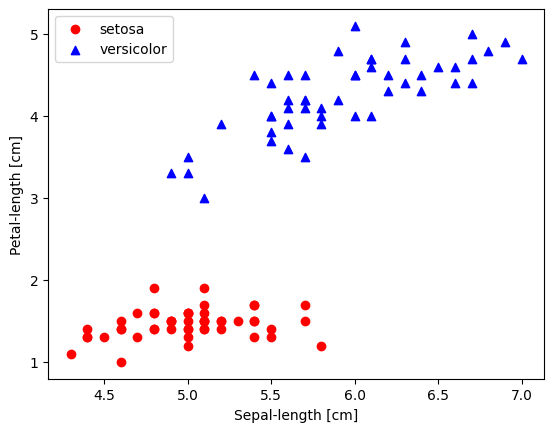

In [9]:
plt.scatter(X[:50,0],X[:50,1],color ='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],color ='blue',marker='^',label='versicolor')
plt.xlabel('Sepal-length [cm]')
plt.ylabel('Petal-length [cm]')
plt.legend(loc='upper left')
plt.show()

weights: [0.21624345 1.39388244 0.93471828]
Epoch 1: 1 errors
weights: [0.01624345 0.79388244 1.31471828]
Epoch 2: 3 errors
weights: [-0.18375655  0.19388244  1.69471828]
Epoch 3: 3 errors
weights: [-0.18375655  0.31388244  2.11471828]
Epoch 4: 2 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 5: 1 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 6: 0 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 7: 0 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 8: 0 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 9: 0 errors
weights: [-0.38375655 -0.70611756  1.83471828]
Epoch 10: 0 errors


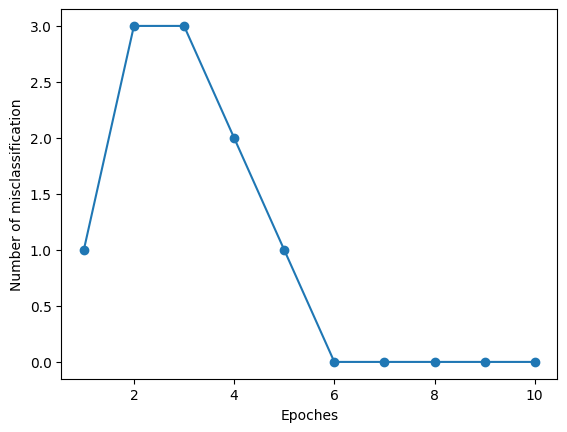

In [10]:
# initial Perception
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)

plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of misclassification')
plt.show()

In [11]:
print('Weights: ', ppn.w_)

Weights:  [-0.38375655 -0.70611756  1.83471828]


Para dibujar una línea que marque el límite de las clases, recordamos que el perceptrón realiza la operación:

$$\omega_0x_0+\omega_1x_1+\omega_2x_2$$

Como la característica de sesgo (*bias*) está definida como $x_0=1$, podemos despejar a $x_2$, obteniendo:

$$w_0 + w_1x_1 + w_2x_2 = 0$$

$$\Rightarrow x_2 = -(w_0 + w_1x_1) / w_2$$

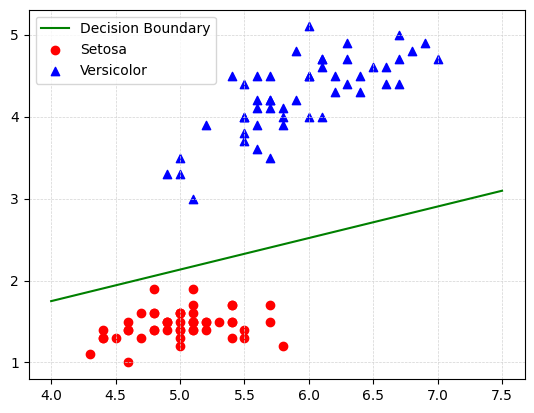

In [12]:
# Decision boundary
x1 = np.linspace(4, 7.5, 2)
x2 = - (ppn.w_[0] + ppn.w_[1]*x1) / ppn.w_[2]
plt.plot(x1, x2, color='green', label='Decision Boundary')
# Clase -1: Setosa
registros = y == -1
x1 = X[registros][:,0]
x2 = X[registros][:,1]
plt.scatter(x1, x2, color='red', marker='o', label='Setosa')
# Clase 1: Versicolor
registros = y == 1
x1 = X[registros][:,0]
x2 = X[registros][:,1]
plt.scatter(x1, x2, color='blue', marker='^', label='Versicolor')
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = np.array(['lime', 'red', 'blue'])
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Class samples
    plt.scatter(X[:,0], X[:,1], alpha=0.9, c=colors[y], edgecolors='black')

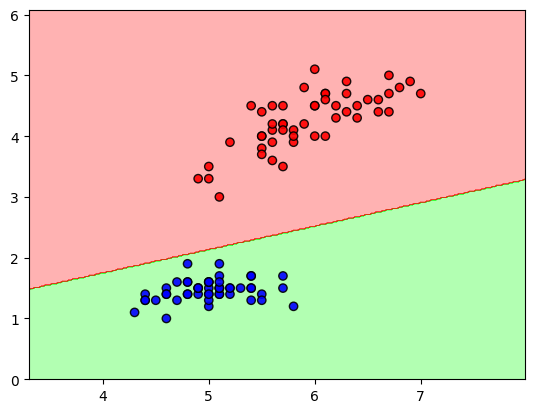

In [14]:
plot_decision_regions(X, y, classifier=ppn)

In [15]:
from mlxtend.plotting import plot_decision_regions

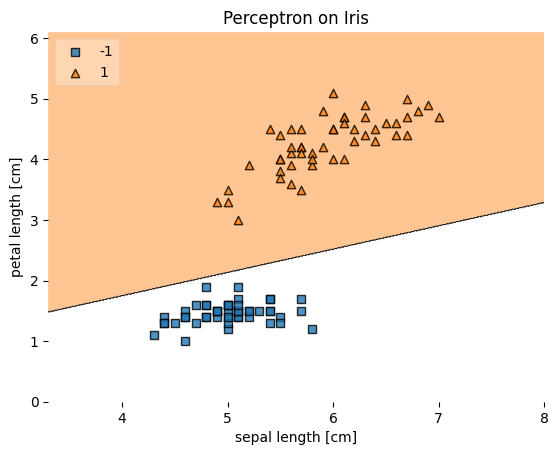

In [16]:
plot_decision_regions(X, y, clf=ppn, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron on Iris')
plt.show()